In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
from matplotlib.gridspec import GridSpec

In [2]:
mock1 = pd.read_csv(r'/home/jin/다운로드/mock_1_tinker13_threshold2_z_0.695_fullbox.txt',delim_whitespace=True)
mock2 = pd.read_csv(r'/home/jin/다운로드/mock_2_tinker13_threshold2_z_0.695_fullbox.txt',delim_whitespace=True)
mock3 = pd.read_csv(r'/home/jin/다운로드/mock_3_tinker13_threshold2_z_0.695_fullbox.txt',delim_whitespace=True)

In [11]:
header = ['x','y','z','vx','vy','vz','gal_type','halo_num_centrais','central_sfr_designation','sfr_designation','halo_num_active_satellites','halo_num_quiescent_satellite','halo_id','halo_mvir','halo_rvir']
mock1.columns = header
mock2.columns = header
mock3.columns = header
mock1

,x,y,z,vx,vy,vz,gal_type,halo_num_centrais,central_sfr_designation,sfr_designation,halo_num_active_satellites,halo_num_quiescent_satellite,halo_id,halo_mvir,halo_rvir
0,25.592903,6.633821,3.117836,-391.839294,62.089817,-524.928772,centrals,1,quiescent,quiescent,0,0,528,7.970423e+12,0.285426
1,35.097164,21.404875,21.083944,86.395103,307.694641,71.107224,centrals,1,active,active,0,0,751,1.653239e+13,0.364009
2,34.030483,17.183306,42.089935,75.358948,646.888672,-35.974247,centrals,1,quiescent,quiescent,0,0,1071,1.219055e+13,0.328858
3,11.709581,5.078568,75.463531,-1026.915283,319.810059,407.775024,centrals,1,quiescent,quiescent,0,0,6171,1.198178e+13,0.326969
4,30.626518,15.291899,73.812653,-179.617752,69.456482,229.147156,centrals,1,active,active,0,0,6897,5.623317e+12,0.254096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152207,2901.866455,2553.694336,2732.902588,1207.356567,874.223938,434.298492,quiescent_satellites,1,quiescent,quiescent,2,3,16532562,4.297250e+14,1.078277
2152208,2902.027100,2554.555420,2732.912842,1677.224976,-1020.480042,667.007263,quiescent_satellites,1,quiescent,quiescent,2,3,16532562,4.297250e+14,1.078277
2152209,2849.178223,2707.027832,2921.423340,846.192993,158.424942,765.078979,quiescent_satellites,0,quiescent,quiescent,0,1,16629772,3.185262e+13,0.452948
2152210,2888.343506,2590.007812,2815.408203,719.550354,756.971375,-944.807922,quiescent_satellites,1,quiescent,quiescent,0,1,16658004,9.278396e+13,0.646881


In [8]:
#ii = (mock1['central_sfr_designation'] == 'active').__and__(mock1['sfr_designation'] == 'active').__and__(mock1['gal_type'] == 'centrals') 
ii = (mock1['halo_num_centrais'] == 0 ).__or__(mock1['halo_num_active_satellites']  == 0).__or__(mock1['halo_num_quiescent_satellite'] == 0)
mm1 = mock1.loc[ii]

dd = mm1['halo_id'].to_numpy()



In [57]:
jj = mock1['halo_id'] == 11169469.0

mm3 = mock1.loc[jj]
mm3

,x,y,z,vx,vy,vz,gal_type,halo_num_centrais,central_sfr_designation,sfr_designation,halo_num_active_satellites,halo_num_quiescent_satellite,halo_id,halo_mvir,halo_rvir
30725,1760.587524,120.874969,331.629974,15.355476,-463.545959,-139.721817,centrals,1,quiescent,quiescent,0,0,11169469,1.695180e+13,0.367061


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(mm1["x"], mm1['y'], mm1["z"], s=5, alpha=0.5)

In [ ]:
ii = mock1['halo_id'] == 15802964.0
mm2 = mock1.loc[ii]
tt = mm2[mm2['halo_num_active_satellites'] >0]
c0 = tt['gal_type'] == 'centrals'
c1 = tt['gal_type'] == 'active_satellites'
c2 = tt['gal_type'] == 'quiescent_satellites'

cen = tt.loc[c0]
act = tt.loc[c1]
qui = tt.loc[c2]

plt.plot(cen['x'],cen['y'],'ko')
plt.plot(act['x'],act['y'],'bo')
plt.plot(qui['x'],qui['y'],'ro')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(cen['x'],cen['y'],cen['z'],c='k')
ax.scatter(act['x'],act['y'],act['z'],c='b')
ax.scatter(qui['x'],qui['y'],qui['z'],c='r')

In [71]:
tt = mock1[(mock1['halo_num_centrais'] >0)] #& (mock1['halo_num_active_satellites'] > 0 )
tt['halo_id'].value_counts()

#df.value_counts('A')

15802964    18
299710      14
1946066     14
8398601     13
7359851     12
            ..
7185108      1
15698127     1
15694033     1
11493586     1
16777216     1
Name: halo_id, Length: 1818805, dtype: int64

In [72]:
jj = mock1['halo_id'] == 15802964

mm3 = mock1.loc[jj]
mm3

,x,y,z,vx,vy,vz,gal_type,halo_num_centrais,central_sfr_designation,sfr_designation,halo_num_active_satellites,halo_num_quiescent_satellite,halo_id,halo_mvir,halo_rvir
35650,2756.004883,231.925949,535.404968,182.354919,-109.952972,118.167839,centrals,1,active,active,0,0,15802964,4.240949e+12,0.231289
75070,2835.139893,2875.436523,16.557907,95.188278,-259.549988,-96.203743,centrals,1,quiescent,quiescent,1,14,15802964,1.150266e+15,1.497153
77358,2835.937988,2875.402344,16.672253,-958.752747,2.743990,465.011505,active_satellites,1,quiescent,active,1,14,15802964,1.150266e+15,1.497153
78461,2835.064941,2875.418945,16.517782,-879.203857,-2970.212891,1274.338989,quiescent_satellites,1,quiescent,quiescent,1,14,15802964,1.150266e+15,1.497153
78462,2834.909424,2874.959229,16.121559,-1323.083984,-423.779541,1287.628906,quiescent_satellites,1,quiescent,quiescent,1,14,15802964,1.150266e+15,1.497153
78463,2835.010254,2875.404053,15.522383,617.019409,-1076.123413,-1654.414917,quiescent_satellites,1,quiescent,quiescent,1,14,15802964,1.150266e+15,1.497153
78464,2835.193359,2875.621338,16.602940,875.371155,985.043945,-1297.077881,quiescent_satellites,1,quiescent,quiescent,1,14,15802964,1.150266e+15,1.497153
78465,2834.670898,2875.124023,16.620888,176.655182,897.802917,3069.475342,quiescent_satellites,1,quiescent,quiescent,1,14,15802964,1.150266e+15,1.497153
78466,2835.844727,2875.268555,16.537392,-327.831970,-402.570709,-1164.786011,quiescent_satellites,1,quiescent,quiescent,1,14,15802964,1.150266e+15,1.497153
78467,2835.634521,2875.737305,16.482895,-634.059631,623.635010,311.516876,quiescent_satellites,1,quiescent,quiescent,1,14,15802964,1.150266e+15,1.497153


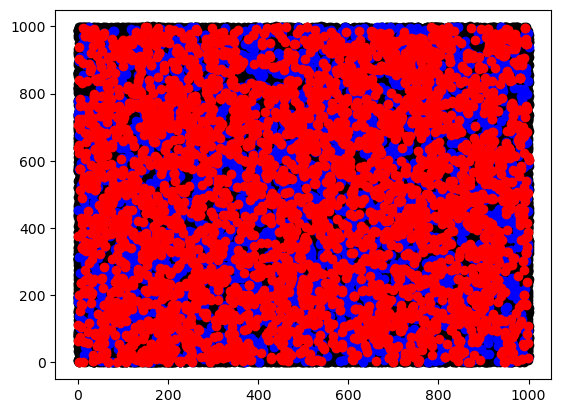

In [80]:
fig = plt.figure()
c0 = mock1['gal_type'] == 'centrals'
c1 = mock1['gal_type'] == 'active_satellites'
c2 = mock1['gal_type'] == 'quiescent_satellites'

cen = mock1.loc[c0]
act = mock1.loc[c1]
qui = mock1.loc[c2]


ii = (mock1['x'] < 1000).__and__(mock1['y'] < 1000).__and__(mock1['z'] < 1000)
tt = mock1.loc[ii]

r = np.sqrt()









# cen = tt.loc[c0]
# act = tt.loc[c1]
# qui = tt.loc[c2]

# plt.plot(cen['x'],cen['y'],'ko')
# plt.plot(act['x'],act['y'],'bo')
# plt.plot(qui['x'],qui['y'],'ro')

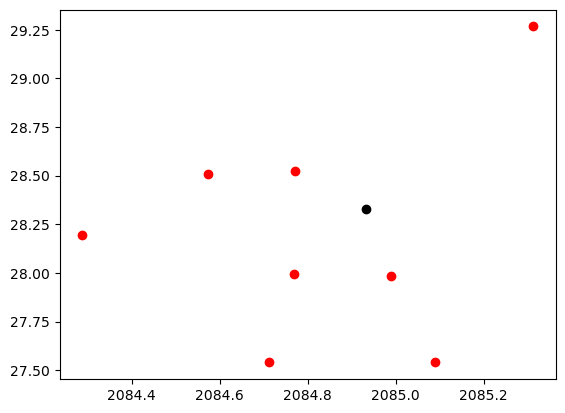

In [63]:
c0 = mm3['gal_type'] == 'centrals'
c1 = mm3['gal_type'] == 'active_satellites'
c2 = mm3['gal_type'] == 'quiescent_satellites'

cen = mm3.loc[c0]
act = mm3.loc[c1]
qui = mm3.loc[c2]

plt.plot(cen['x'],cen['y'],'ko')
plt.plot(act['x'],act['y'],'bo')
plt.plot(qui['x'],qui['y'],'ro')

In [40]:
tt = mock1[(mock1['halo_num_centrais'] >0)]
tt['halo_id'].value_counts()
#df.value_counts('A')

13475427    14
7992230     14
12033499    13
11625518    13
14757891    13
            ..
13701212     1
12823880     1
14203142     1
236878       1
2049         1
Name: halo_id, Length: 1815639, dtype: int64

In [52]:
jj = mock2['halo_id'] == 7992230  

mm3 = mock2.loc[jj]
mm3

,x,y,z,vx,vy,vz,gal_type,halo_num_centrais,central_sfr_designation,sfr_designation,halo_num_active_satellites,halo_num_quiescent_satellite,halo_id,halo_mvir,halo_rvir
733528,1252.516602,1045.796631,986.840637,182.328873,-50.492950,828.885864,centrals,1,quiescent,quiescent,2,11,7992230,1.362652e+15,1.584145
743315,1251.666016,1046.870239,986.866577,-2028.238525,770.848450,-1136.777710,active_satellites,1,quiescent,active,2,11,7992230,1.362652e+15,1.584145
743316,1251.431152,1045.556763,987.021118,165.910721,-1560.531250,1716.268555,active_satellites,1,quiescent,active,2,11,7992230,1.362652e+15,1.584145
744429,1251.911621,1045.609619,986.226074,1085.186768,-531.745422,369.778290,quiescent_satellites,1,quiescent,quiescent,2,11,7992230,1.362652e+15,1.584145
744430,1252.472168,1046.427246,986.886047,-139.378571,2304.656250,1102.186646,quiescent_satellites,1,quiescent,quiescent,2,11,7992230,1.362652e+15,1.584145
744431,1253.362427,1046.490723,987.121033,929.386963,-683.870605,-122.388016,quiescent_satellites,1,quiescent,quiescent,2,11,7992230,1.362652e+15,1.584145
744432,1253.364380,1045.592896,985.966919,-709.883057,1415.491577,477.550446,quiescent_satellites,1,quiescent,quiescent,2,11,7992230,1.362652e+15,1.584145
744433,1252.359131,1046.121216,987.064331,-2063.266602,-133.917557,962.838379,quiescent_satellites,1,quiescent,quiescent,2,11,7992230,1.362652e+15,1.584145
744434,1252.776978,1046.338257,986.499512,1024.011230,1158.295776,2130.757568,quiescent_satellites,1,quiescent,quiescent,2,11,7992230,1.362652e+15,1.584145
744435,1253.199097,1045.319824,986.277405,1129.698975,-1162.082520,103.950317,quiescent_satellites,1,quiescent,quiescent,2,11,7992230,1.362652e+15,1.584145


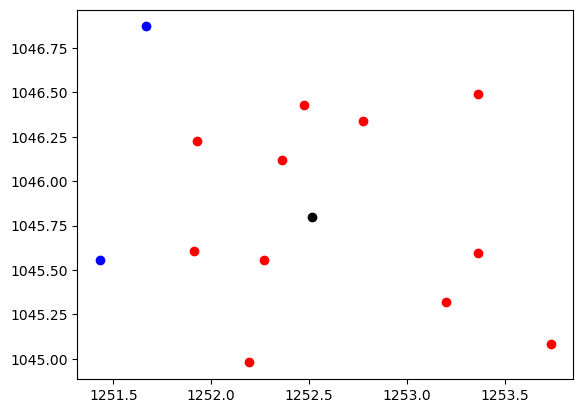

In [46]:


tt = mm3[mm3['halo_num_active_satellites'] >0]
c0 = tt['gal_type'] == 'centrals'
c1 = tt['gal_type'] == 'active_satellites'
c2 = tt['gal_type'] == 'quiescent_satellites'

cen = tt.loc[c0]
act = tt.loc[c1]
qui = tt.loc[c2]

plt.plot(cen['x'],cen['y'],'ko')
plt.plot(act['x'],act['y'],'bo')
plt.plot(qui['x'],qui['y'],'ro')

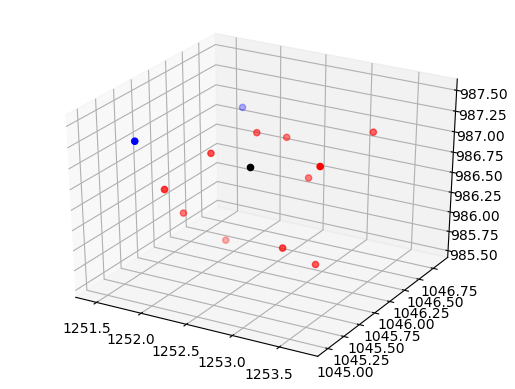

In [28]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(cen['x'],cen['y'],cen['z'],c='k')
ax.scatter(act['x'],act['y'],act['z'],c='b')
ax.scatter(qui['x'],qui['y'],qui['z'],c='r')

In [29]:
def ax_vis(n, halo_id, sat, centrals, sat_active, coord1, coord2, fig, gs):
    ax = fig.add_subplot(gs[n, 0])
    ax.set_ylabel('{} coord'.format(coord2),fontsize=40)
    ax.set_xlabel('{} coord'.format(coord1),fontsize=40)
    ax.set_title('Halo: {}. Plane {}{}'. format(halo_id, coord1, coord2), fontsize = 50)
    ax.scatter(sat[coord1], sat[coord2], s = sat['halo_mvir'] / 1e13, color = 'blue', label = 'Satellite and non-active')
    ax.scatter(centrals[coord1], centrals[coord2], s = centrals['halo_mvir'] / 1e13, color= 'k', label = 'Central')
    ax.scatter(sat_active[coord1], sat_active[coord2], s = sat_active['halo_mvir'] / 1e13, color= 'red', label = 'Satellite and active')
    for spine in ['top', 'right','bottom','left']:
        ax.spines[spine].set_linewidth(2)
    ax.tick_params(labelsize=30,length=5,width=2)
    ax.set_xlim(sat[coord1].min() - 5, sat[coord1].max() + 5)
    ax.set_ylim(sat[coord2].min() - 5, sat[coord2].max() + 5)
    ax.grid()
    radius = sat['halo_rvir'].iloc[0]
    circle = plt.Circle((centrals[coord1].iloc[0], centrals[coord2].iloc[0]), radius, edgecolor='black', facecolor='none')
    ax.add_patch(circle)
    ax.legend(loc = 'lower right', fontsize = 20)
    return

In [30]:
def threed_vis(sat, centrals, sat_active):
    fig = plt.figure(figsize = (25, 25))
    ax = fig.add_subplot(111, projection = '3d')
    cb = ax.scatter(sat['x'], sat['y'], sat['z'], s = sat['halo_mvir'] / 1e13, color = 'blue', label = 'Satellite and non-active')
    cb2 = ax.scatter(centrals['x'], centrals['y'], centrals['z'], s = centrals['halo_mvir'] / 1e13, color= 'k', label = 'Central')
    cb3 = ax.scatter(sat_active['x'], sat_active['y'], sat_active['z'], s = sat_active['halo_mvir'] / 1e13, color= 'red', label = 'Satellite and active')
    ax.set_xlabel('x coord', fontsize = 25)
    ax.set_ylabel('y coord', fontsize = 25)
    ax.set_zlabel('z coord', fontsize = 25)
    ax.set_title('Mock 1 model Tinker', fontsize = 25)
#     ax.view_init(elev=50, azim=-190)
    for spine in ['top', 'right','bottom','left']:
        ax.spines[spine].set_linewidth(2)
    ax.tick_params(labelsize=10,length=5,width=2)
    ax.legend(loc = 'best', fontsize = 20)
    
    radius = sat['halo_rvir'].iloc[0]
    center = (centrals['x'].iloc[0], centrals['y'].iloc[0], centrals['z'].iloc[0])

    # Create sphere data
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 50)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))

    ax.plot_surface(x, y, z, color='white', alpha = 0.2)
    return


In [67]:
def vis_halo(halo_id):
    
    mock2_vs = mock2[mock2['halo_id'] == halo_id]

    mock2_filtered = mock2_vs.groupby('halo_mvir').filter(lambda x: len(x) > 1)
    centrals = mock2_filtered[(mock2_filtered['gal_type'] != 'quiescent_satellites') & (mock2_filtered['gal_type'] != 'active_satellites') ]
    sat = mock2_filtered[mock2_filtered['gal_type'] == 'quiescent_satellites']
    sat_active = mock2_filtered[mock2_filtered['gal_type'] == 'active_satellites']
    
    fig = plt.figure(figsize=(30, 30))
    fig.set_facecolor('white')
    gs = GridSpec(3, 1, figure=fig)
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
    
    ax_vis(0, halo_id, sat, centrals, sat_active, 'x', 'y', fig, gs)
    ax_vis(1, halo_id, sat, centrals, sat_active, 'x', 'z', fig, gs)   
    ax_vis(2, halo_id, sat, centrals, sat_active, 'y', 'z', fig, gs)
    threed_vis(sat, centrals, sat_active)

    return

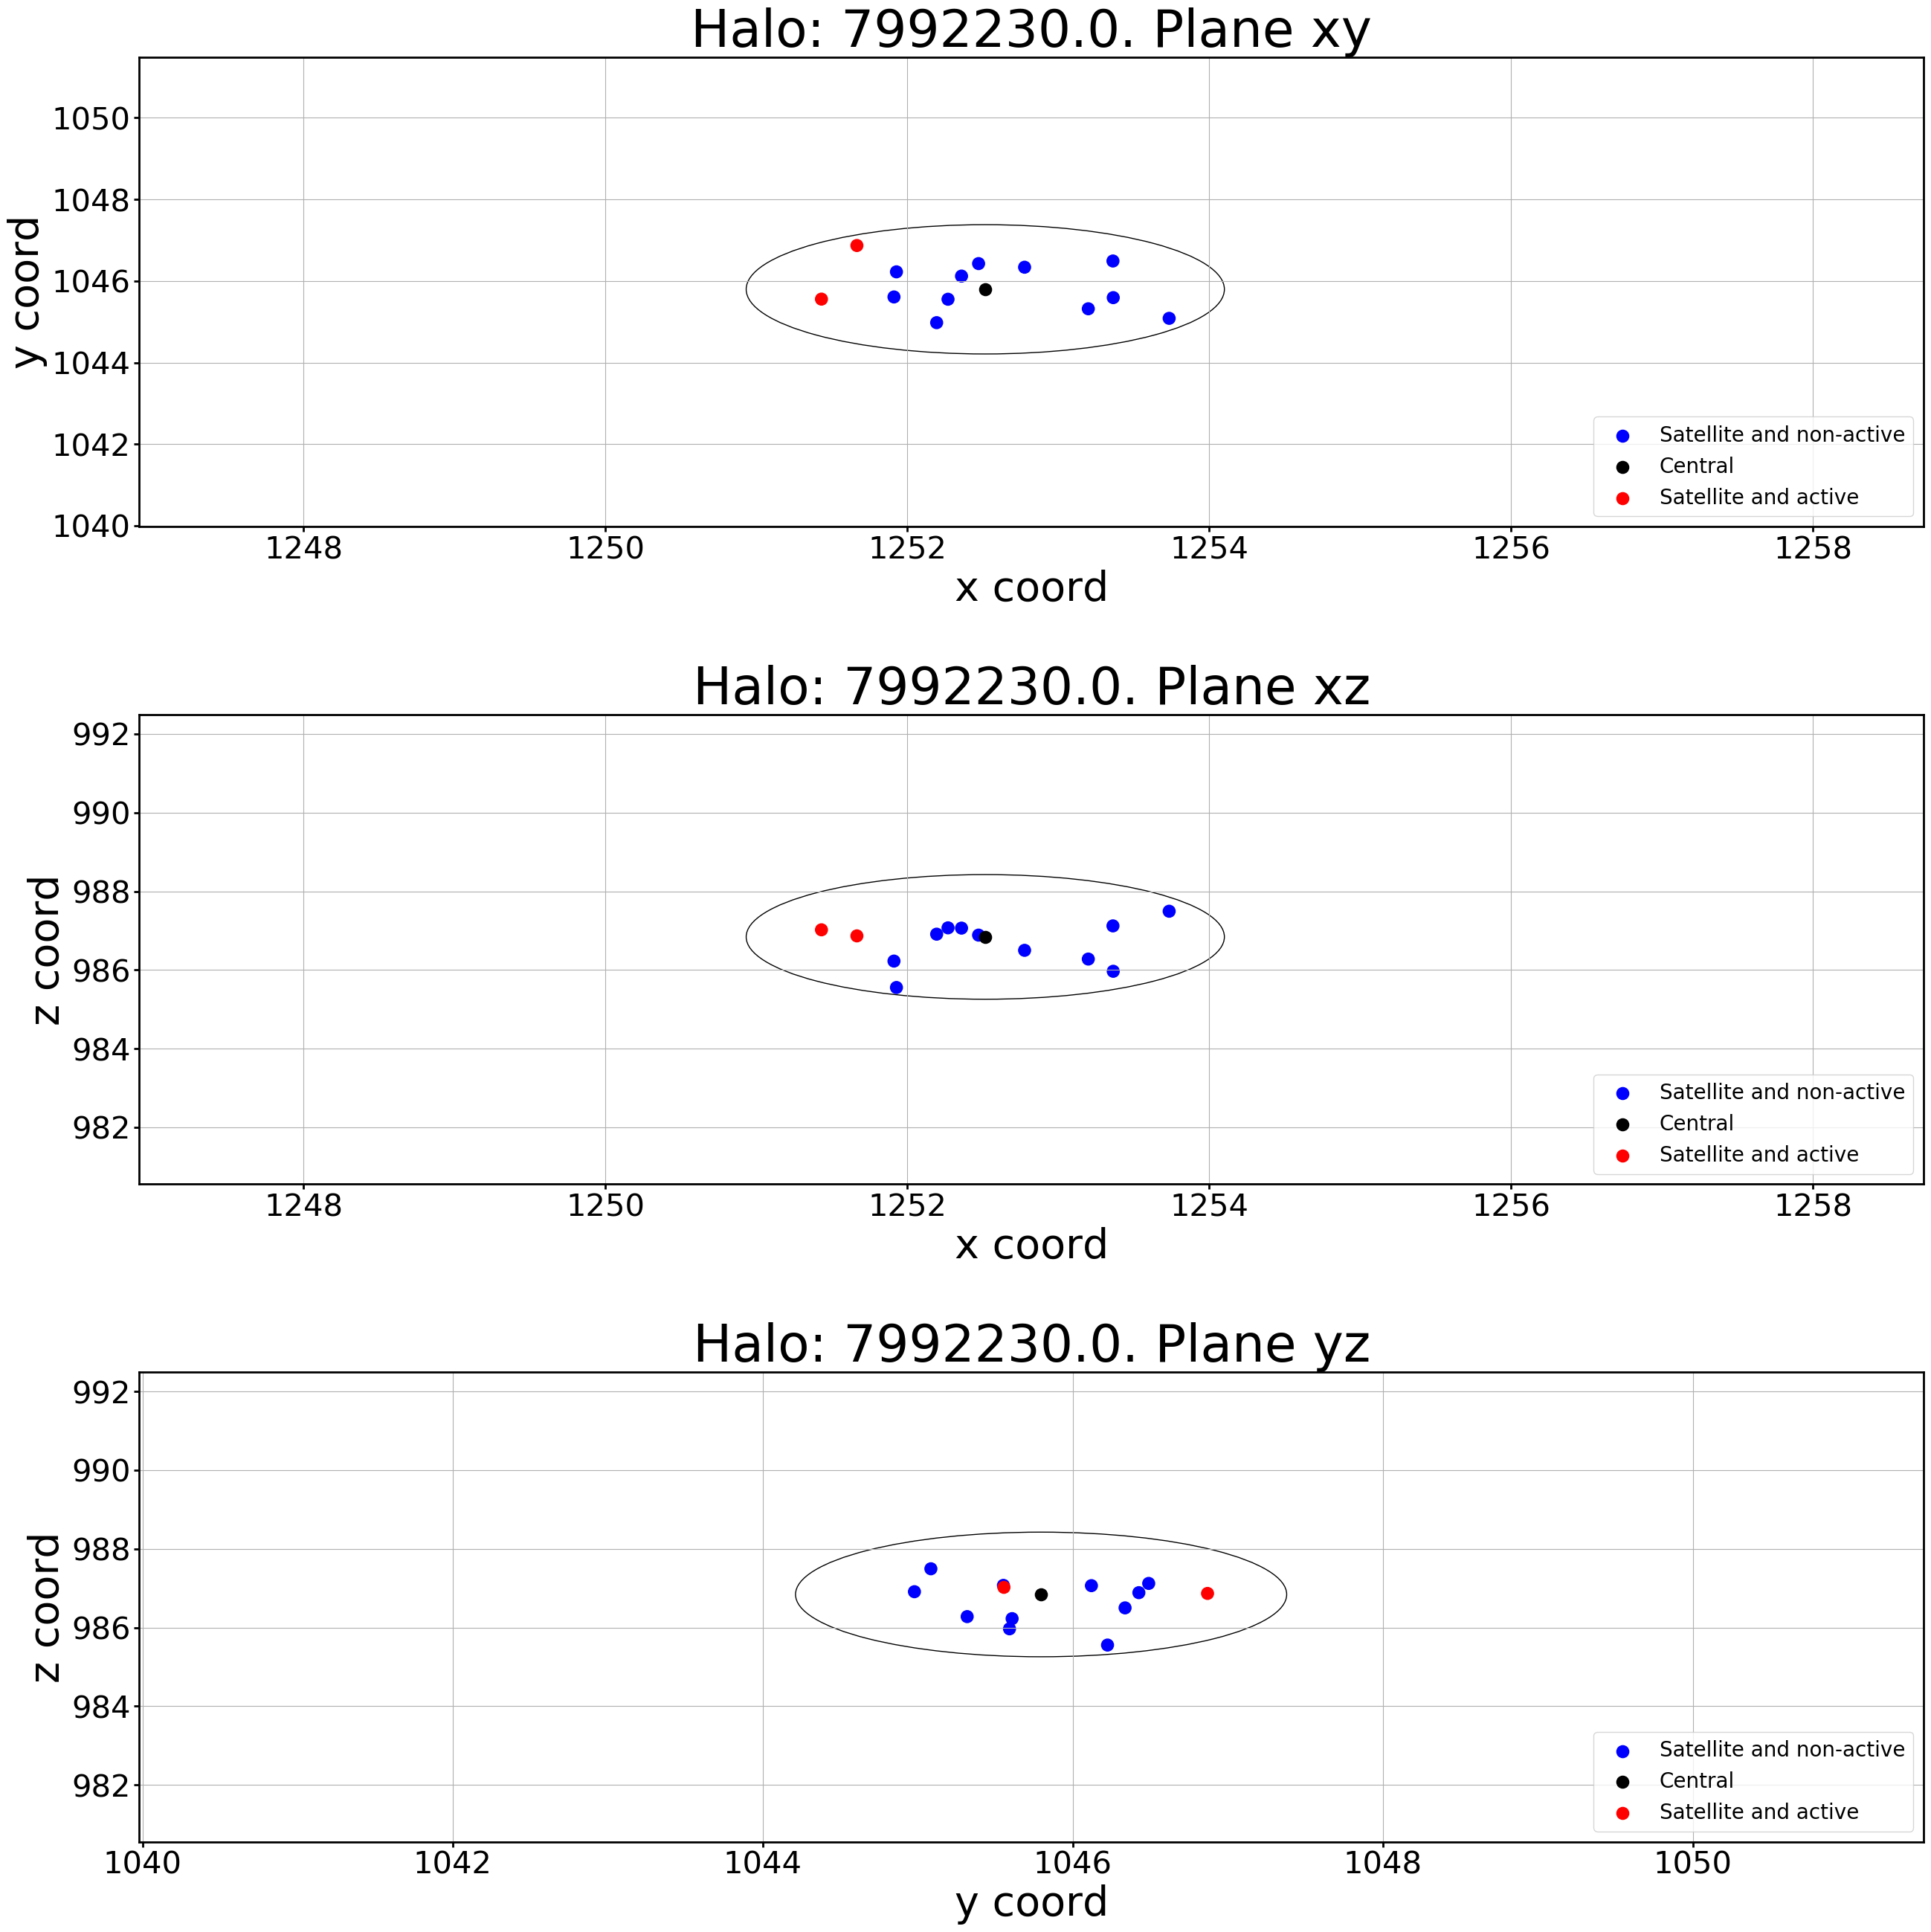

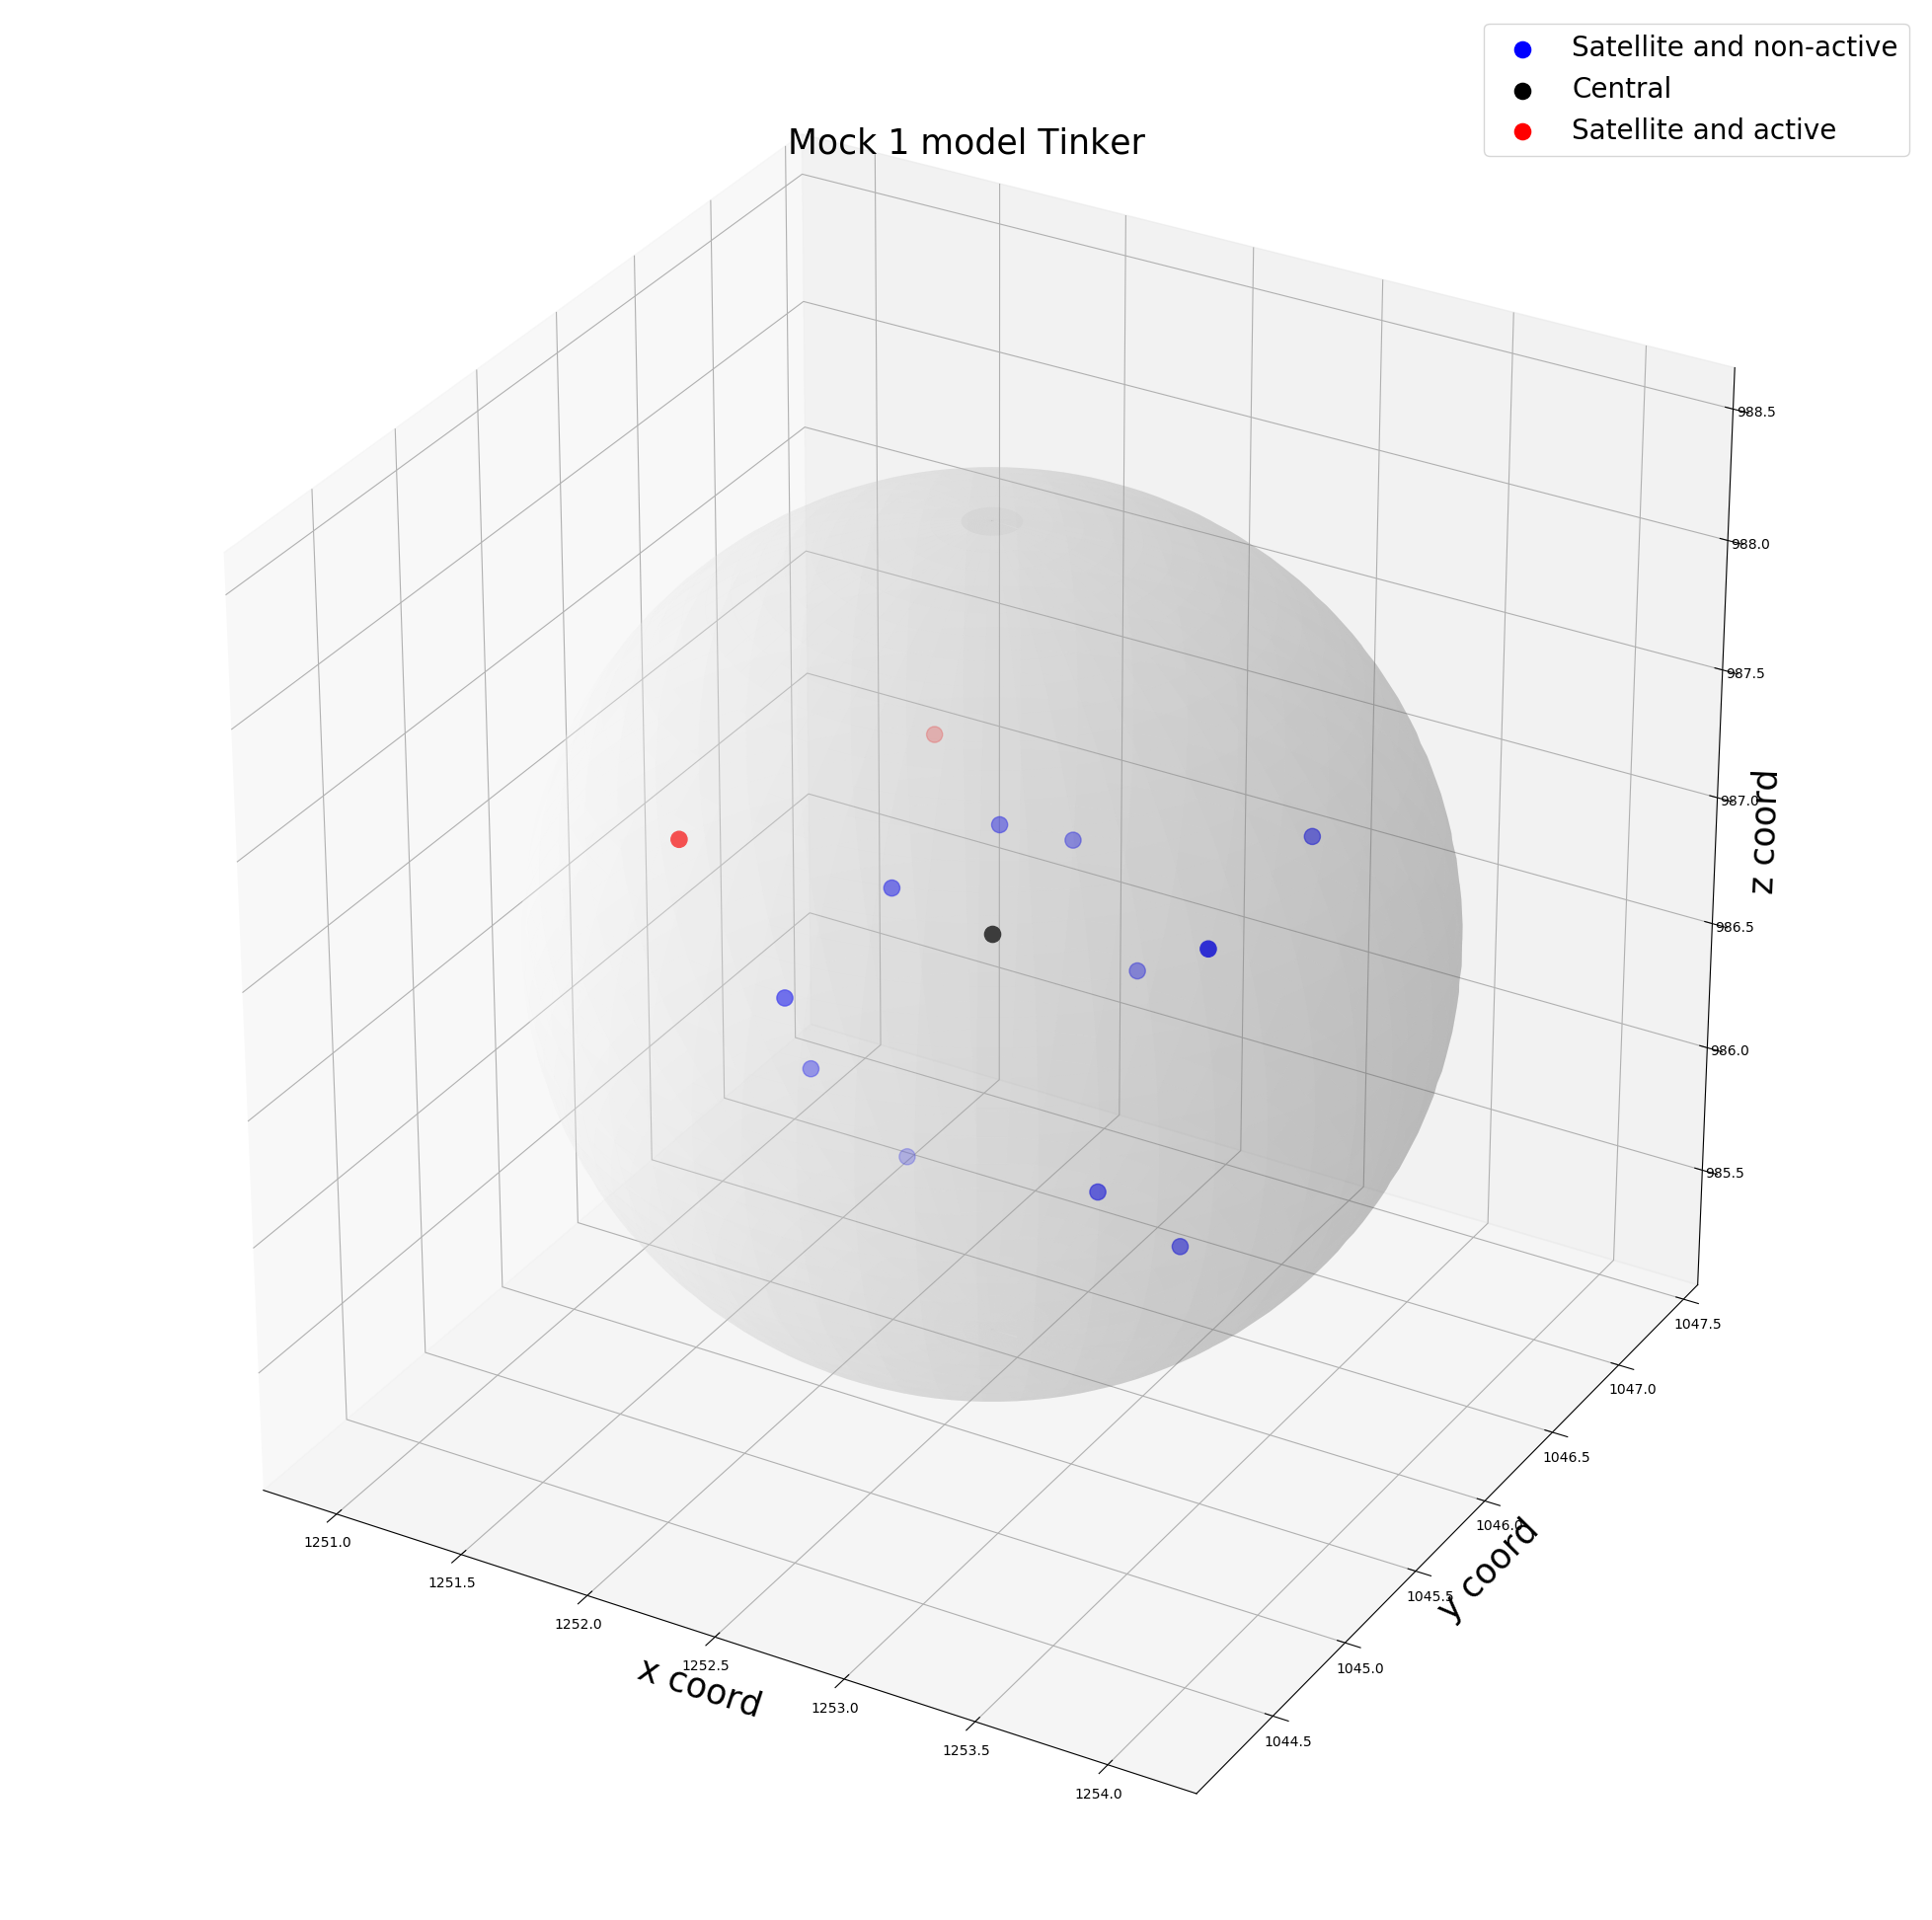

In [68]:
vis_halo(7992230.0 )

In [ ]:
tt = mock3[(mock3['halo_num_centrais'] >0)]
tt.value_counts('halo_id')
#df.value_counts('A')

In [ ]:
jj = mock3['halo_id'] == 11978912  

mm3 = mock3.loc[jj]
mm3

In [ ]:
def vis_halo(halo_id):
    
    mock3_vs = mock3[mock3['halo_id'] == halo_id]

    mock3_filtered = mock3_vs.groupby('halo_mvir').filter(lambda x: len(x) > 1)
    centrals = mock3_filtered[(mock3_filtered['gal_type'] != 'quiescent_satellites') & (mock3_filtered['gal_type'] != 'active_satellites') ]
    sat = mock3_filtered[mock3_filtered['gal_type'] == 'quiescent_satellites']
    sat_active = mock3_filtered[mock3_filtered['gal_type'] == 'active_satellites']
    
    fig = plt.figure(figsize=(10, 30))
    fig.set_facecolor('white')
    gs = GridSpec(3, 1, figure=fig)
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
    
    ax_vis(0, halo_id, sat, centrals, sat_active, 'x', 'y', fig, gs)
    ax_vis(1, halo_id, sat, centrals, sat_active, 'x', 'z', fig, gs)   
    ax_vis(2, halo_id, sat, centrals, sat_active, 'y', 'z', fig, gs)
    threed_vis(sat, centrals, sat_active)

    return

In [ ]:
vis_halo(11978912 )